![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---
# Data-X: Introduction to Natural Language Processing (NLP) using NLTK

**Author list (in no particular order):** [Niki Collette](https://www.linkedin.com/in/nikicollette/), [Debbie Yuen](http://www.debbiecyuen.me/), [Alexander Fred-Ojala](https://www.linkedin.com/in/alexanderfo/), [Ikhlaq Sidhu](https://ikhlaq-sidhu.com/), and [Elias Castro Hernandez](https://www.linkedin.com/in/ehcastroh/).
    
**Video Walkthrough:** To view walkthrough of this notebook, click [here](https://youtu.be/H7QYxdPJFy8)

**References and Additional Resources:** See end of this notebook for additional information related to textual data processing.

**License Agreement:** Feel free to do whatever you want with this code

___


## What is Natural Language Processing (NLP):

[NLP](https://en.wikipedia.org/wiki/Natural_language_processing) is the combination of deep linguistic modeling, data analysis, and computational machine learning and deep learning models applied to natural language. There are several areas of ongoing research related to NLP, for example:

> [Part-of-Speech (POS) Tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging)<br>
> [Named Entity Recognition (NER)](https://en.wikipedia.org/wiki/Named-entity_recognition)<br>
> [Sentiment Analysis](https://en.wikipedia.org/wiki/Sentiment_analysis)<br>
> [Conference Resolution](https://nlp.stanford.edu/projects/coref.shtml)<br>
> [Word Sense Disambiguation](https://en.wikipedia.org/wiki/Word-sense_disambiguation) <br>
> [Parsing](https://en.wikipedia.org/wiki/Parsing)<br>
> [Machine Translation](https://en.wikipedia.org/wiki/Machine_translation)<br>
> [Information Extraction](https://en.wikipedia.org/wiki/Information_extraction)<br>
> [Question and Answering](https://en.wikipedia.org/wiki/Question_answering)<br>
> [Paraphrase](https://en.wikipedia.org/wiki/Paraphrasing_(computational_linguistics))<br>
> [Summarization](https://en.wikipedia.org/wiki/Automatic_summarization)<br>
> [Dialog](https://en.wikipedia.org/wiki/Dialogue_system)<br>
> [Text Generation](https://cs.stanford.edu/~zxie/textgen.pdf)

#### Import packages

In [2]:
#make compatible with Python 2 and Python 3
from __future__ import print_function, division, absolute_import 

# data manipulaiton
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt

# jupyter notebook magic to display plots in output
%matplotlib inline

# make the plots bigger
plt.rcParams['figure.figsize'] = (10,6) 

## Explore the data

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="NLTK-01.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

<br>

The following section covers some general steps for exploring textual data. For a detailed description of the dataset, as well as alternatives to text processing using machine learning classifiers, see the **References and Additional Resources** section at the end of this notebook.

___

<br>

**Load Data**

In [3]:
# Use header = 0 (first line contains col names)
# use delimiter=\t (columns are separated by tabs)
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

<br>

**Dataset Statistics**

In [4]:
train.shape

(25000, 3)

In [5]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


<br>

**Check for missing data**

In [10]:
# Check for missing data
train.info() # no NaN's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


<br>

**Visualize missing data**

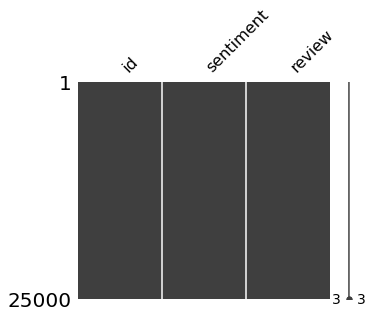

In [11]:
# Visually check for missing data
import missingno as msno
%matplotlib inline

# Visualize missing values as a matrix 
msno.matrix(train, figsize=(5,4)) 

<br>

**Check $+ / - $ Spread:**<br>
How many movie reviews are positive and how many are negative in labeledTrainData.tsv? Do we have balance between the classes?

> **Note:** The sentiment of the reviews are binary, meaning an IMDB rating < 5 results in a sentiment score of 0, and a rating >=7 have a sentiment score of 1 (no reviews with score 5 or 6 are included in the analysis). 

(25000, 3)

Number of Data Samples for every label output. 1=postive, 0=negative:
1    12500
0    12500
Name: sentiment, dtype: int64


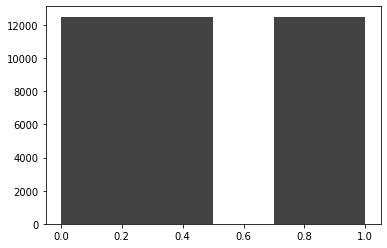

In [12]:
# get pos/neg count
print(train.shape)
print('\nNumber of Data Samples for every label output. 1=postive, 0=negative:')
print(train.sentiment.value_counts())

# visualize class balance
train.sentiment.hist(histtype = 'bar', bins=[0.0, 0.5, 0.7, 1.0], grid=False, color = '#424242'); 

<br>

**Explore Textual Data**

In [13]:
# find average character length of a review
print('Average character length of the reviews are:')
lengths = train['review'].apply(len)
print (np.mean(lengths))

Average character length of the reviews are:
1329.71056


___
## Textual Data Processing using NLTK: Cleaning, Tokenizing, Stemming, Lemmatization, Stopwords

<br>
<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="NLTK-02.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>


<br>

[NLTK](https://www.nltk.org/) is a leading platfom for working with human language data built for Python. NLTK interfaces with over [50 corpora and lexical resources](http://www.nltk.org/nltk_data/), and includes a suite of processing libraries for tasks such as [classification](https://www.nltk.org/api/nltk.classify.html#module-nltk.classify), [tokenization](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize), [stemming](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem), [tagging](https://www.nltk.org/api/nltk.tag.html#module-nltk.tag), [parsing](https://www.nltk.org/api/nltk.parse.html#module-nltk.parse), [sentiment](https://www.nltk.org/api/nltk.sentiment.html#module-nltk.sentiment) and [semantic parsing](https://www.nltk.org/api/nltk.sem.html#module-nltk.sem). For a practical guide to NLTK, check out [the book](http://www.nltk.org/book/) on NLTK written by NLTK's creators.

Finally, following are some **key(words/concepts)** related to this module.
> **Wordform** - the full inflected surface form.<br> 
> - *dog* and *dogs* have different wordforms.<br>

> **Lemma** - same stem, part of speech, or rough word sense. <br>
> - *cat* can *cats* have same lemma.<br>

> **Type** - element of the vocabulary.<br>
> - *She enjoyed the cold lemonade, in the hot sun.* --> *the* is a Type.<br>

> **Token** - an instance of a particular type in a text.<br>
> - *She enjoyed the cold lemonade, in the hot sun.* --> *the* is a Type with two Tokens.<br>

> **Normalization** - ensuring that indexed text and query terms hav ethe same form.<br>
> - *U.S.A.* matches *USA*<br>

> **Lemmatization** - reducing inflections or variants to base form.<br>
> - *car*, *cars*, *car's*, *cars'* $\longrightarrow$ *car*<br>

> **Morphemes** - the smallest unit that makes up a word.<br>
> - **Stems** - the core meaning-bearing units.<br>
> - **Affixes** - adhere to stems and serve some grammatical function.<br>
> - *stems* - Given the word, in the parenthesis $(stem)s$ is the stem, while in this case in the parenthesis $stem(s)$, is the affix.

> **Stemming** - the crude chopping of affixes.<br>
> - *automates*, *automatic*, *automation* $\longrightarrow$ *automat*
___

<br>

**Load NLTK and Download Modules**

In [14]:
# regular expressions, text parsing, and ML classifiers
import re
import bs4 as bs
import nltk 

# download NLTK classifiers
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# import ml classifiers
from nltk.tokenize import sent_tokenize # tokenizes sentences
from nltk.stem import PorterStemmer     # parsing/stemmer
from nltk.tag import pos_tag            # parts-of-speech tagging
from nltk.corpus import wordnet         # sentiment scores
from nltk.stem import WordNetLemmatizer # stem and context
from nltk.corpus import stopwords       # stopwords

eng_stopwords = stopwords.words('english')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ehch/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/ehch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ehch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ehch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<br>

**Extract Review for Establishin Analysis Procedure**

In [15]:
# the review used for initial analysis
review3 = train['review'][3] 
print(review3)

"It must be assumed that those who praised this film (\"the greatest filmed opera ever,\" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \"about\" should be allowed anywhere near a theatre or film studio; Syberberg, very fashionably, but without the smallest justification from Wagner's text, decided that Parsifal is \"about\" bisexual integration, so that the title character, in the latter stages, transmutes into a kind of beatnik babe, though one who continues to sing high tenor -- few if any of the actors in the film are the singers, and we get a double 

In [96]:
review3 = '<html><body><p>"Good luck. May the Force be with you."</p></body></html>'

<br>

#### Clean the review - Remove HTML Tags

___

> First we would like to clean up the reviews. As you can see many interviews contain `\` characters in front of quotation symobols, "`<br/>` tags, numbers, abbrevations etc.

> We want to remove all the HTML tags in the third review, by creating a [beatifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) object and then using the `.text` method. Save results in variable `review3`

In [97]:
import bs4 as bs

# Before removing HTML tags
bs.BeautifulSoup(review3, features='lxml')

<html><body><p>"Good luck. May the Force be with you."</p></body></html>

In [99]:
# After removing HTML tags
review3 = bs.BeautifulSoup(review3,features='lxml').text # HTML --> Text
print(review3)

"Good luck. May the Force be with you."


<br>

#### Tokenization and Sentence Segmentation

___

> We tokenize using NLTK's `sent_tokenizer` and count the number of sentences in `review3` 

In [103]:
# import tokenizer
from nltk.tokenize import sent_tokenize

print("Tokenized Sentences -- No. Sentences: ", len(sent_tokenize(review3)))
sent_tokenize(review3) # doesn't really split all sentences

Tokenized Sentences -- No. Sentences:  2


['"Good luck.', 'May the Force be with you. "']

<br> 

**Hack for Binary Classifier**

[Sentence Segmentation](https://en.wikipedia.org/wiki/Text_segmentation#Sentence_segmentation) can be an irritant if not properly dealt with. While `!` and `?` clearly denote the end of the sentence, the period `.` is not so clear cut. For example, if we always segment sentences at a period, abbreviations -- e.g. `Dr.` -- and numbers -- e.g. `.05%` -- will lead to incorrect segmentation.  The following provides a simple hack -- that is, it may work for particular instances but never in general -- for getting around the issue.  

In [104]:
# Check if it does a better job if we add space after every period
review3 = review3.replace('.','. ')

print("Sentence Segmentaion -- No. Sentences: ", len(sent_tokenize(review3)), end='\n\n') # number of sentences

# print all sentences on a new line
for sent in sent_tokenize(review3):
    print(sent, end='\n\n')

Sentence Segmentaion -- No. Sentences:  2

"Good luck.

May the Force be with you.  "



<br>

#### Normalization

___

> We can do this using [Regular Expressions](https://web.stanford.edu/~jurafsky/slp3/2.pdf) - [package `re`](https://docs.python.org/3/library/re.html). Regular expressions define search patterns for text that can be used to search, replace, substitute, etc., certain patterns in text data.

> We'll use regular expression to only look for non-alphabetical characters, `[^a-zA-Z]` and replace them with `''`. Save results in variable `review3`. For an intro to Regex see [here](http://www.aivosto.com/vbtips/regex.html).

<br>

**Remove all punctuation and special characters**

In [106]:
# regular expressions
import re

# get string/object obtained by replacing 
# the leftmost non-overlapping occurrences 
# of the pattern 'not a-z in lower/upper case' 
# with an empty space.
review3 = re.sub('[^a-zA-Z ]' ,'',review3)
print(review3)

Good luck   May the Force be with you  


<br>

**All letters to lower case, and every word as one element in a list**

> **Note:** When we split the sentence strings into a list of words, the process is called [tokenization](https://en.wikipedia.org/wiki/Text_segmentation#Word_segmentation).

In [107]:
# everything to lower case

review3 = review3.lower()
print(review3)

good luck   may the force be with you  


In [109]:
# tokenize
review3_words = review3.split()

# slice of first ten elements
print(review3_words[:10]) 

['good', 'luck', 'may', 'the', 'force', 'be', 'with', 'you']


<br>

#### Stemming


___

We use [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) to handle similar words as one in the same -- e.g. *give*, *gives*, *given* := *give* -- by reducing each word to its base or root form. Similar words, that is having the same stem, will be interpreted as the same word. 

> To use NLTK's PorterStemmer import it `from nltk.stem import PorterStemmer`).<br> 
> Create a new PorterStemmer object, `stemmer = PorterStemmer()`, and run it on every word in `review3_words`.<br>
> Print the results as one string (don't overwrite the existing `review3_words` variable). 

In [123]:
# import Porter Stemmer
from nltk.stem import PorterStemmer

#initialize Porter Stemmer object
ps = PorterStemmer() 

# iterate over word list
ps_stems = []
for w in review3_words:
    ps_stems.append(ps.stem(w))

# add all the stemmed words to one string
print(' '.join(ps_stems)) 

good luck may the forc be with you


<br>

#### Part of Speech (POS) Tagging

___


Now we want to [Part Of Speech (POS)](https://www.nltk.org/api/nltk.tag.html?highlight=parts%20speech%20tagging#nltk-tag-package) tag the third movie review. We will use POS labeling, also called grammatical tagging. 

> To use NLTK's POS tagging import it `from nltk.tag import pos_tag`.<br> 
> When you use `pos_tag` on a word it returns a token-tag pair in the form of a tuple.<br> 
> In NLTK's Penn Treebank POS, the abbreviation (tag) for an adjective is JJ and NN for singular nouns. 

We want to count the number of singular nouns (NN) and adjectives (JJ) in `review3_words` using NLTK's pos_tag. A list of the Penn Treebank pos_tag's follows.

In [124]:
penn_pos_tags ={'CC'   : 'Coordinating conjunction',              'CD'  : 'Cardinal number',                    'DT'   : 'Determiner', 
                'EX'   : 'Existential there',                     'FW'  : 'Foreign word',                       'IN'   : 'Preposition or subordinating conjunction', 
                'JJ'   : 'Adjective',                             'JJR' : 'Adjective, comparative',             'JJS'  : 'Adjective, superlative',
                'LS'   : 'List item marker',                      'MD'  : 'Modal',                              'NN'   : 'Noun, singular or mass', 
                'NNS'  : 'Noun, plural',                          'NNP' : 'Proper noun, singular',              'NNPS' : 'Proper noun, plural',
                'PDT'  : 'Predeterminer',                         'POS' : 'Possessive ending',                  'PRP'  : 'Personal pronoun',
                'PRP$' : 'Possessive pronoun',                    'RB'  : 'Adverb',                             'RBR'  : 'Adverb, comparative',
                'RBS'  : 'Adverb, superlative',                   'RP'  : 'Particle',                           'SYM'  : 'Symbol',
                'TO'   : 'to',                                    'UH'  : 'Interjection',                       'VB'   : 'Verb, base form',
                'VBD'  : 'Verb, past tense',                      'VBG' : 'Verb, gerund or present participle', 'VBN'  : 'Verb, past participle',
                'VBP'  : 'Verb, non-3rd person singular present', 'VBZ' : 'Verb, 3rd person singular present',  'WDT'  : 'Wh-determiner',
                'WP'   : 'Wh-pronoun',                            'WP$' : 'Possessive wh-pronoun',              'WRB'  : 'Wh-adverb',
               }

In [127]:
# part-of-speech tagging
from nltk.tag import pos_tag

# tagging
token_tag = pos_tag(review3_words)

# get tag's meaning
def tag_meaning(tag, index):
    return (tag[index]) 

# print first n-entries and tag's meaning
n=10
for i in range(len(review3_words)):
    print(token_tag[i], " ---> ", penn_pos_tags[tag_meaning(token_tag[i], 1)])
    

('good', 'JJ')  --->  Adjective
('luck', 'NN')  --->  Noun, singular or mass
('may', 'MD')  --->  Modal
('the', 'DT')  --->  Determiner
('force', 'NN')  --->  Noun, singular or mass
('be', 'VB')  --->  Verb, base form
('with', 'IN')  --->  Preposition or subordinating conjunction
('you', 'PRP')  --->  Personal pronoun


<br>

**Count number of nouns and adjectives**

In [126]:
# Cell that count nouns (NN) and adjectives (JJ) in review3
NN_count = 0
JJ_count = 0

for pair in token_tag:
    tag = pair[1]
    if tag == 'JJ':
        JJ_count+=1
    elif tag == 'NN':
        NN_count+=1
print('\nNumber of nouns:', NN_count)
print('Number of adjectives:', JJ_count)


Number of nouns: 2
Number of adjectives: 1


<br>

#### Lemmatization

___

An even more sophisticated operation than stemming using the PorterStemmer is called lemmatizing. [Lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html), in contrast to stemming, does not simply remove the suffix/prefix of words but instead removes the  inflectional endings only and returns the base dictionary of a word -- that is, the synonyms. 

> In order to use lemmatizing we need to define the wordnet POS tag. We do this through a function that takes in a POS Penn Treebank tag and converts it to a wordnet tag, and then lemmatizes words in a string has been given written below. 

In [117]:
# group together by inflected forms of a word
def get_wordnet_pos(treebank_tag):
    """
        @treebank_tag (type:str) is a Penn Treebank tag
        @return is the givent wordnet tag
    """
    
    if treebank_tag.startswith('J'):
        return(wordnet.ADJ)
    elif treebank_tag.startswith('V'):
        return(wordnet.VERB)
    elif treebank_tag.startswith('N'):
        return(wordnet.NOUN)
    elif treebank_tag.startswith('R'):
        return(wordnet.ADV)
    else:
        return('n')  # return 'noun' as catchall

In [119]:
# perform morpholagical analysis
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

wnl_stems = []
for pair in token_tag:
    res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
    wnl_stems.append(res)

print(' '.join(wnl_stems))

good luck may the force be with you


<br>

#### StopWords

___


Lastly we want to remove the [stopwords](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html), which are common words that don't carry much information. In English, for example, they could be *'am'*, *'are'*, *'and'*, *'the'*, etc. 

> To import NLTK's list of stopwords you need to download the stopword corpora (`import nltk` and then `nltk.download()` if you don't have it). <br>
> When that is done run `from nltk.corpus import stopwords` and create a variable for English stopwords with `eng_stopwords = stopwords.words('english')`.<br> 
> Use the list of English stopwords to remove all the stopwords from your list of words in the third movie review, i.e. `review3_words`. <br>
> Print `review3_words` without stopwords, count the number of stopwords removed and print them as well.

In [120]:
# import stopwords corpora
from nltk.corpus import stopwords

eng_stopwords = stopwords.words('english')
print(eng_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [122]:
# remove stopwords
review3_wo_stopwords = [w for w in review3_words if not w in stopwords.words("english")]
removed_stopwords = [w for w in review3_words if w in stopwords.words("english")]

print('REVIEW WITHOUT STOPWORDS: ')
print(' '.join(review3_wo_stopwords))
print()
print('Stop words removed: ')
print(removed_stopwords)
print()
print('NUMBER OF STOPWORDS REMOVED:',len(removed_stopwords))

REVIEW WITHOUT STOPWORDS: 
good luck may force

Stop words removed: 
['the', 'be', 'with', 'you']

NUMBER OF STOPWORDS REMOVED: 4


___

## Preparing the Dataset for Classification

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="NLTK-03.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>


<br>

In this part we'll put everything that we've learned together. This will allow us to make accurate predictions on the individual review's sentiment.


We'll create a function called `review_cleaner` that reads in a review and:

> - Removes HTML tags (using beautifulsoup)
> - Extract emoticons (emotion symbols, aka smileys :D )
> - Removes non-letters (using regular expression)
> - Converts all words to lowercase letters and tokenizes them (using .split() method on the review strings, so that every word in the review is an element in a list)
> - Removes all the English stopwords from the list of movie review words
> - Join the words back into one string seperated by space, append the emoticons to the end

<br>

**Pro Tip:** Transform the list of stopwords to a set before removing the stopwords -- i.e. assign `eng_stopwords = set(stopwords.words("english"))`. Use the set to look up stopwords. This will substantially speed up the computations (Python is much quicker when searching a set than a list).

<br>

___

<strong style='color:red'>Consideration:</strong> Depending on your Python version as well as how you strucuture your code, when timing executions with `%%time` you are likely to run into the following error: 

> `UsageError: Can't use statement directly after '%%time'!`

To get around the issue, you can install the `execute_time` extension from `nbextensions` -- more on the topic [here](https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tree/7672d429957aaefe9f2e71b15e3b78ebb9ba96d1/src/jupyter_contrib_nbextensions/nbextensions/execute_time). Alternatively, you can time execution using Python's [timeit](https://docs.python.org/3/library/timeit.html) module by using function decorators (implemented), or by wrapping your code blocks with a start and stop variable.

```python
    # very first line in cell
    start_time = timeit.default_timer()
    # last line in cell
    elapsed = timeit.default_timer() - start_time
```
<br>

In [92]:
##### Keep track of computation times using function decorator #####
# python module
import time

def time_usage(func):
    def wrapper(*args, **kwargs):
        beg_ts = time.time()
        retval = func(*args, **kwargs)
        end_ts = time.time()
        print("\nElapsed time: %f" % (end_ts - beg_ts))
        return retval
    return wrapper

# decorator --> @time_usage
###################################################################

___

<br>

**One function to automate it all**

In [93]:
def review_cleaner(review):
    '''
        Clean and preprocess a review.
            1. Remove HTML tags
            2. Extract emoticons
            3. Use regex to remove all special characters (only keep letters)
            4. Make strings to lower case and tokenize / word split reviews
            5. Remove English stopwords
            6. Rejoin to one string
        
        @review (type:str) is an unprocessed review string
        @return (type:str) is a 6-step preprocessed review string
    '''
    
    #1. Remove HTML tags
    review = bs.BeautifulSoup(review).text
    
    #2. Use regex to find emoticons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', review)
    
    #3. Remove punctuation
    review = re.sub("[^a-zA-Z]", " ",review)
    
    #4. Tokenize into words (all lower case)
    review = review.lower().split()
    
    #5. Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    review = [w for w in review if not w in eng_stopwords]
    
    #6. Join the review to one sentence
    review = ' '.join(review+emoticons)
    # add emoticons to the end

    return(review)

In [30]:
# putting everything together
review_cleaner(train['review'][3])

'must assumed praised film greatest filmed opera ever read somewhere either care opera care wagner care anything except desire appear cultured either representation wagner swan song movie strikes unmitigated disaster leaden reading score matched tricksy lugubrious realisation text questionable people ideas opera matter play especially one shakespeare allowed anywhere near theatre film studio syberberg fashionably without smallest justification wagner text decided parsifal bisexual integration title character latter stages transmutes kind beatnik babe though one continues sing high tenor actors film singers get double dose armin jordan conductor seen face heard voice amfortas also appears monstrously double exposure kind batonzilla conductor ate monsalvat playing good friday music way transcendant loveliness nature represented scattering shopworn flaccid crocuses stuck ill laid turf expedient baffles theatre sometimes piece imperfections thoughts think syberberg splice parsifal gurneman

<br>

#### Create Original, Porter Stemmed, and Lemmatized data sets
___
    
**Create three lists:**<br>
> `review_clean_original` - contains all the reviews from the train DataFrame, that have been cleaned by the function `review_cleaner` defined above.<br>
> `review_clean_ps`  - applies the PorterStemmer to the reviews in `review_clean_original`.<br> 
> `review_clean_wnl` - contains words that have been lemmatized using NLTK's WordNetLemmatizer on the words in the list `review_clean_original`.

<br>

**Note:** NLTK version 3.2.2 crashes when trying to use the PorterStemming on the string 'oed' (known bug). Therefore, use an if statement to skip just that specific string/word. Also, keep in mind that completing the entire process can take $>10$mins to run on a laptop.

<br>

**Cleaned, Original Textual Data**

In [72]:
@time_usage
def clean_original():
    # training set entries
    num_reviews = len(train['review'])

    # for storing cleaned review
    review_clean_original = []

    # iterate over reviews
    for i in range(0,num_reviews):
        # batching astep notification
        if( (i+1)%1000 == 0 ):        
            # print progress
            print("Done with %d reviews" %(i+1)) 

        review_clean_original.append(review_cleaner(train['review'][i]))
    return(review_clean_original)

In [73]:
review_clean_original = clean_original()


Elapsed time: 0.031150


In [74]:
# sanity check
review_clean_original[3]

['g',
 '',
 '',
 '',
 '',
 'b',
 '',
 'e',
 '',
 '',
 'l',
 '',
 '',
 'f',
 'r',
 '',
 'e',
 'n',
 '',
 '',
 '',
 '',
 '',
 '',
 'f',
 '',
 'r',
 'c',
 'e']

<br>

**Apply Porter Stemming**

In [34]:
@time_usage
def clean_porterStemmer():
    # training set entries
    num_reviews = len(train['review'])
    
    # Porter stemming on the results in review_clean_original
    review_clean_ps = []
    ps = PorterStemmer()

    # iterate over reviews
    for i in range(0,num_reviews):
        # batching step notification
        if( (i+1)%1000 == 0 ):
            # print progress
            print("Done with %d reviews" %(i+1)) 
        ps_stems = []
        for w in review_clean_original[i].split():
            if w == 'oed':
                continue
            ps_stems.append(ps.stem(w))

        review_clean_ps.append(' '.join(ps_stems))
    return(review_clean_ps)

In [35]:
review_clean_ps = clean_porterStemmer()

Done with 1000 reviews
Done with 2000 reviews
Done with 3000 reviews
Done with 4000 reviews
Done with 5000 reviews
Done with 6000 reviews
Done with 7000 reviews
Done with 8000 reviews
Done with 9000 reviews
Done with 10000 reviews
Done with 11000 reviews
Done with 12000 reviews
Done with 13000 reviews
Done with 14000 reviews
Done with 15000 reviews
Done with 16000 reviews
Done with 17000 reviews
Done with 18000 reviews
Done with 19000 reviews
Done with 20000 reviews
Done with 21000 reviews
Done with 22000 reviews
Done with 23000 reviews
Done with 24000 reviews
Done with 25000 reviews

Elapsed time: 50.125455


In [36]:
# sanity check
review_clean_ps[3]

'must assum prais film greatest film opera ever read somewher either care opera care wagner care anyth except desir appear cultur either represent wagner swan song movi strike unmitig disast leaden read score match tricksi lugubri realis text question peopl idea opera matter play especi one shakespear allow anywher near theatr film studio syberberg fashion without smallest justif wagner text decid parsif bisexu integr titl charact latter stage transmut kind beatnik babe though one continu sing high tenor actor film singer get doubl dose armin jordan conductor seen face heard voic amforta also appear monstrous doubl exposur kind batonzilla conductor ate monsalvat play good friday music way transcend loveli natur repres scatter shopworn flaccid crocus stuck ill laid turf expedi baffl theatr sometim piec imperfect thought think syberberg splice parsif gurnemanz mountain pastur lush provid juli andrew sound music sound hard endur high voic trumpet particular possess aural glare add anoth s

<br>

**Apply Lemmatization**

In [75]:
@time_usage
def clean_lemmatizer():
    # Lemmatizer
    
    # training set entries
    num_reviews = len(train['review'])

    review_clean_wnl = []
    wnl = WordNetLemmatizer()

    # iterate over entries
    for i in range(0,num_reviews):
        # batching step notification
        if( (i+1)%1000 == 0 ):
            # print progress
            print("Done with %d reviews" %(i+1)) 

        wnl_stems = []
        token_tag = pos_tag(review_clean_original[i].split())

        # lemmatization
        for pair in token_tag:
            res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
            wnl_stems.append(res)

        review_clean_wnl.append(' '.join(wnl_stems))
    return(review_clean_wnl)

In [76]:
review_clean_wnl = clean_lemmatizer()

IndexError: list index out of range

In [39]:
# sanity check
review_clean_wnl[3]

'must assume praised film great film opera ever read somewhere either care opera care wagner care anything except desire appear culture either representation wagner swan song movie strike unmitigated disaster leaden reading score match tricksy lugubrious realisation text questionable people idea opera matter play especially one shakespeare allow anywhere near theatre film studio syberberg fashionably without small justification wagner text decide parsifal bisexual integration title character latter stag transmutes kind beatnik babe though one continue sing high tenor actor film singer get double dose armin jordan conductor see face heard voice amfortas also appear monstrously double exposure kind batonzilla conductor ate monsalvat play good friday music way transcendant loveliness nature represent scatter shopworn flaccid crocus stick ill lay turf expedient baffle theatre sometimes piece imperfection thought think syberberg splice parsifal gurnemanz mountain pasture lush provide julie 

<br>

___

## References and Additional Resources
___

#### Install NLTK

https://www.nltk.org/install.html

```bash
    # on a terminal or using hot keys
    pip install -U nltk
```

___

#### Data description
>Data source: https://www.kaggle.com/c/word2vec-nlp-tutorial/data<br>

>Data Description:<br><br>
We will be using Kaggle's **Bag of Words Meets Bags of Popcorn** dataset to explore [IMBD](https://www.imdb.com/) movie review data. The dataset is placed in the module folder containting this notebook if you cloned the [Data-X](https://datax.berkeley.edu/) Github repo). Labeled training dataset consists of 25,000 IMDB movie reviews. There is also an unlabeled test set with 25,000 IMDB movie reviews. The sentiment of the reviews are binary, meaning an IMDB rating < 5 results in a sentiment score of 0, and a rating >=7 have a sentiment score of 1 (no reviews with score 5 or 6 are included in the analysis). No individual movie has more than 30 reviews.



>Data Sets:<br>
>* ```labeledTrainData.tsv``` --> The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id (numerical), sentiment (categorical), and text for each review (textual).<br>
>* ```testData.tsv``` --> The unlabeled test set. 25,000 rows containing an id (numerical), and text for each review (textual). 



___

#### Visualize Missing Data

[Missingno](https://github.com/ResidentMario/missingno) is a Python library that visualizes the distribution of `NaN` values.  It is fully compatible with Pandas, and as such can serve as an excellent data prepossessing step.

In [40]:
# install the library
#! pip install missingno

In [41]:
# import libraries
import pandas as pd
import missingno as msno
%matplotlib inline

In [42]:
# load data
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

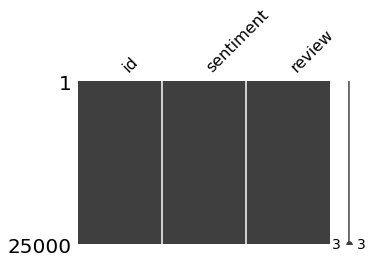

In [43]:
# Visualize missing values as matrix 
msno.matrix(train, figsize=(5,3)) # no NaNs

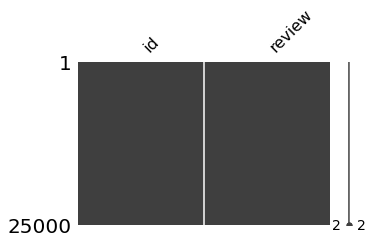

In [44]:
# Visualize missing values as a matrix 
msno.matrix(test, figsize = (5, 3)) # no NaN's

___

#### Visualizing Review WordClouds

In [45]:
# install wordcloud
#! pip install wordcloud

In [46]:
# seeding
import random

# plotting
import matplotlib.pyplot as plt

# jupyter notebook magic to display plots in output
%matplotlib inline

# make the plots bigger
plt.rcParams['figure.figsize'] = (10,6) 

<br>

**Recall the three lists created:**<br>
> `review_clean_original` - contains all the reviews from the train DataFrame, that have been cleaned by the function `review_cleaner` defined above.<br>
> `review_clean_ps`  - applies the PorterStemmer to the reviews in `review_clean_original`.<br> 
> `review_clean_wnl` - contains words that have been lemmatized using NLTK's WordNetLemmatizer on the words in the list `review_clean_original`.

In [47]:
print(type(review_clean_original))
print(type(review_clean_ps))
print(type(review_clean_wnl))

<class 'list'>
<class 'list'>
<class 'list'>


In [48]:
from wordcloud import WordCloud, STOPWORDS

# custom color for wordcloud 
def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return("hsl(0, 0%%, %d%%)" % random.randint(70, 100))

# visualize wordcloud
def visualize_wordcloud(data, word_count):
    """
        @data (type:list) is list containing string object of processed textual review data
        @returns none
    """

    # create single string from list of strings
    combined_text = " ".join([review for review in data])

    # Initialize wordcloud object
    wordcloud = WordCloud(background_color='#282828', 
                          width=414, 
                          height=736, 
                          margin=0, 
                          max_words=word_count).generate(combined_text)
    
    # Display the generated image:
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


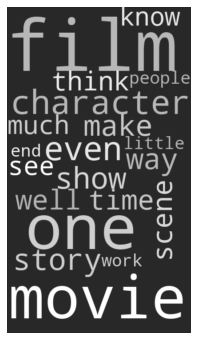

In [49]:
visualize_wordcloud(review_clean_original, 20)

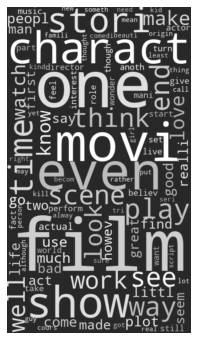

In [50]:
visualize_wordcloud(review_clean_ps, 100)

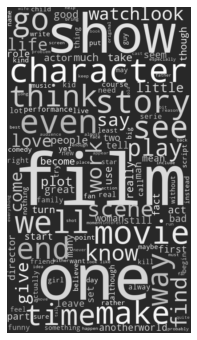

In [51]:
visualize_wordcloud(review_clean_wnl, 150)

___

#### Textual Data Processing Using Regular Expressions

[Regular expressions](https://web.stanford.edu/~jurafsky/slp3/2.pdf) is a formal language for working with text strings, and are often the first model for any text processing task in practical NLP. Although [machine learning classifiers](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623) are used for harder text processing task, they use regular expressions as features and thus warrant some consideration when undergoing a textual data preprocessing process. 

___

#### SHELL for **Freakishly Fast** Textual Data Processing

This topic could be a module onto itself, and it is a valuable skill to have -- particularly when working with big data and distributed clusters. Using SHELL's native parallelism and piping can result in freakishly fast processing times.

> [Process ~2Gb of data on laptop in 12 seconds (270MB/sec), or in 26 minutes using a 7c1.medium Hadoop cluster (1.14MB/sec)](https://adamdrake.com/command-line-tools-can-be-235x-faster-than-your-hadoop-cluster.html). It should be noticed that some of the benefits may not carry as you move into higher orders of magnitude in data size.<br>   
> [Data Science at the Command Line](https://www.datascienceatthecommandline.com/) - Deep dive (free book)

___

## Additional Content and Sources


> [Bag of Words Meets Bag of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)<br>
> [Python Machine Learning Book](https://github.com/rasbt/python-machine-learning-book/tree/master/code)<br> 
> [Machine Learning With Text in Scikit-Learn](https://github.com/justmarkham/pycon-2016-tutorial)<br>
> [Natural Language Processing with Python (aka the NLTK Book)](http://www.nltk.org/book/)

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="DataX_icon_wide_logo.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___